In [99]:
from BasicCNN import basicCNNPipeline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import random
import os

import warnings
warnings.filterwarnings("ignore")

In [69]:
train_path = r"C:\Users\shubh\DataScience\BasicCNN\SignsMNIST\Train"
test_path = r"C:\Users\shubh\DataScience\BasicCNN\SignsMNIST\Test"

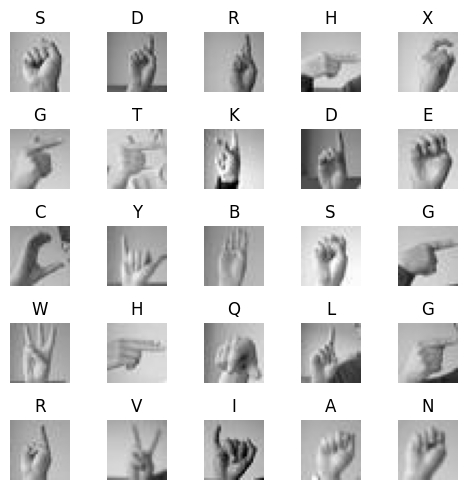

In [70]:
fig, axs = plt.subplots(5, 5, figsize=(5, 5))

for i in range(0, 5):
    picked_letter = random.sample(os.listdir(train_path), 5)
    for j, label in enumerate(picked_letter):
        img_dir = os.path.join(train_path, label)
        image_name = random.sample(os.listdir(img_dir), 1)
        image_path = os.path.join(img_dir, image_name[0])
        image = cv2.imread(image_path)
        axs[i,j].imshow(image, cmap='gray')
        axs[i,j].axis('off')
        axs[i,j].set_title(str(label))

plt.tight_layout()
plt.show()  

In [71]:
picked_letter = random.sample(os.listdir(train_path), 1)
image_name = random.sample(os.listdir(img_dir), 1)
image_path = os.path.join(img_dir, image_name[0])
image_path = os.path.join(img_dir, image_name[0])
image = cv2.imread(image_path)
image.shape

(28, 28, 3)

In [72]:
cnn = basicCNNPipeline()
cnn.loadDataset(train_path, test_path, (28, 28), 0.2)

Found 21974 images belonging to 24 classes.
Found 5481 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.


In [73]:
warnings.filterwarnings('ignore')
cnn.loadModel((28,28,1))
cnn.compileModel()

In [74]:
cnn.getModelSummary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0   

In [75]:
warnings.filterwarnings('ignore')
cnn.trainModel(epochs=5)

Epoch 1/5
687/687 [==============================] - 190s 273ms/step - loss: 1.0800 - accuracy: 0.6566 - val_loss: 0.2530 - val_accuracy: 0.9172
Epoch 2/5
687/687 [==============================] - 135s 197ms/step - loss: 0.1582 - accuracy: 0.9494 - val_loss: 0.0944 - val_accuracy: 0.9703
Epoch 3/5
687/687 [==============================] - 21s 30ms/step - loss: 0.0501 - accuracy: 0.9846 - val_loss: 0.0415 - val_accuracy: 0.9856
Epoch 4/5
687/687 [==============================] - 17s 24ms/step - loss: 0.0357 - accuracy: 0.9888 - val_loss: 0.0447 - val_accuracy: 0.9850
Epoch 5/5
687/687 [==============================] - 17s 24ms/step - loss: 0.0340 - accuracy: 0.9899 - val_loss: 0.0097 - val_accuracy: 0.9976


In [76]:
cnn.evaluateModel()

113/113 [==============================] - 33s 295ms/step - loss: 0.2174 - accuracy: 0.9513


1/1 [==============================] - 0s 29ms/step


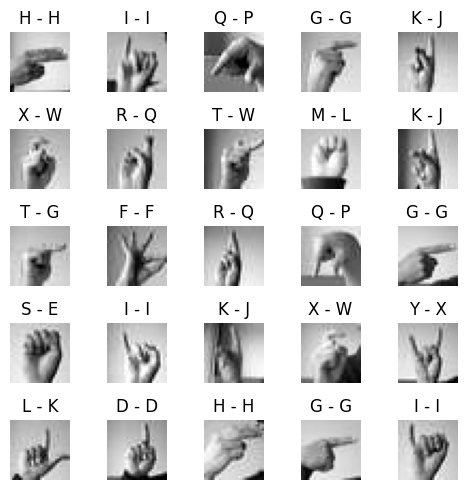

In [78]:
trained_model = cnn.getModel()
fig, axs = plt.subplots(5, 5, figsize=(5, 5))

for i in range(0, 5):
    picked_letter = random.sample(os.listdir(test_path), 5)
    for j, label in enumerate(picked_letter):
        img_dir = os.path.join(test_path, label)
        image_name = random.sample(os.listdir(img_dir), 1)
        image_path = os.path.join(img_dir, image_name[0])

        image = cv2.imread(image_path, 0)
        nor_image = image / 255
        exp_image = np.expand_dims(nor_image,axis=(0,3))
        output = trained_model.predict(exp_image)
        char_idx = np.argmax(output)
        pred_label = chr(65+char_idx)

        axs[i,j].imshow(image, cmap='gray')
        axs[i,j].axis('off')
        axs[i,j].set_title(str(label + " - " + pred_label))

plt.tight_layout()
plt.show()

In [79]:
true_label  = []
prediceted_label = []
ch = 65
for folder in os.listdir(test_path):
    try:
        test_img = [cv2.imread(os.path.join(test_path, folder, x),0) for x in os.listdir(os.path.join(test_path, folder))]
        test_img = [x / 255 for x in test_img]
        test_img = [np.expand_dims(x, axis=(0, 3)) for x in test_img]

        output = [trained_model.predict(x) for x in test_img]
        pred_labels = [chr(65 + np.argmax(x)) for x in output]

        prediceted_label.extend(pred_labels)
        true_label.extend([folder]*len(pred_labels))
    except Exception as e:
        print(e)
        pass

1/1 [==============================] - 0s 28ms/step


<Figure size 10000x10000 with 0 Axes>

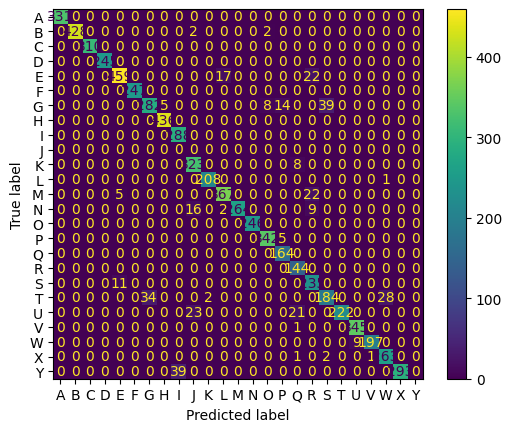

In [98]:
from sklearn import metrics

confusion_matric = metrics.confusion_matrix(true_label, prediceted_label)
conf_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matric, display_labels=[chr(x) for x in range(65, 65+25)])

plt.figure(figsize=(100, 100))
conf_display.plot()
plt.show()

In [100]:
precision = metrics.precision_score(true_label, prediceted_label, average=None)
recall = metrics.recall_score(true_label, prediceted_label, average=None)
f1_score = metrics.f1_score(true_label, prediceted_label, average=None)

metrics_df = pd.DataFrame({'Precision': precision, 'Recall': recall, 'F1-Score': f1_score}, index=[chr(x) for x in range(65, 65+25)])

metrics_df

,Precision,Recall,F1-Score
A,1.000000,1.000000,1.000000
B,1.000000,0.990741,0.995349
C,1.000000,1.000000,1.000000
D,1.000000,1.000000,1.000000
E,0.966316,0.921687,0.943474
F,1.000000,1.000000,1.000000
G,0.892405,0.810345,0.849398
H,0.988662,1.000000,0.994299
I,0.880734,1.000000,0.936585
J,0.000000,0.000000,0.000000
